In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import networkx as nx
import json

In [16]:
df = pd.read_csv('../data_collection/data/processed_data/model_2_data_990.csv')

In [14]:

print(df.head().to_latex(index=False,
                  float_format="{:.1f}".format, longtable=True))

\begin{longtable}{llrrrrrrrrrrrrrrrrrrrr}
\toprule
nominator & validator & era & proportional_bond & total_bond & number_of_validators & solution_bond & validator_frequency_current_era & prev_min_stake & prev_sum_stake & prev_variance_stake & overall_proportional_bond & overall_total_bond & average_proportional_bond & average_total_bond & nominator_index & validator_index & nominator_degree & validator_degree & nominator_centrality & validator_centrality & probability_of_selection \\
\midrule
\endfirsthead
\toprule
nominator & validator & era & proportional_bond & total_bond & number_of_validators & solution_bond & validator_frequency_current_era & prev_min_stake & prev_sum_stake & prev_variance_stake & overall_proportional_bond & overall_total_bond & average_proportional_bond & average_total_bond & nominator_index & validator_index & nominator_degree & validator_degree & nominator_centrality & validator_centrality & probability_of_selection \\
\midrule
\endhead
\midrule
\multicolumn{2

In [87]:
df.head()

,nominator,validator,era,proportional_bond,total_bond,number_of_validators,solution_bond,validator_frequency_current_era,prev_min_stake,prev_sum_stake,...,overall_total_bond,average_proportional_bond,average_total_bond,nominator_index,validator_index,nominator_degree,validator_degree,nominator_centrality,validator_centrality,probability_of_selection
0,15j4dg5GzsL1bw2U2AWgeyAk6QTxq43V7ZPbXdAmbVLjvDCK,12MqEB7VLqKRgxCoGZXriPuo4GNYtaFiQ1tjMZhooPXAycM2,990,2.000000e+16,320000000000000001,16,8.094832e+15,4.0,17010000000000000,6105577224054410002,...,464998900000000001,1.073805e+16,1.162497e+17,0,21901,16,4,0.000721,0.000180,0.999908
1,15j4dg5GzsL1bw2U2AWgeyAk6QTxq43V7ZPbXdAmbVLjvDCK,12eZSMk8GJYE2Lq943dSEnMUoZs1ek7jU8QN3rEA1yPZPjcR,990,2.000000e+16,320000000000000001,16,2.198072e+16,1.0,17010000000000000,6105577224054410002,...,320000000000000001,2.000000e+16,3.200000e+17,0,21905,16,1,0.000721,0.000045,0.991906
2,15j4dg5GzsL1bw2U2AWgeyAk6QTxq43V7ZPbXdAmbVLjvDCK,16Fwe1wFveAWmUJ8WucZmu87iyp5464m9hNqvUP8oE35nwc8,990,2.000000e+16,320000000000000001,16,2.198072e+16,1.0,17010000000000000,6105577224054410002,...,320000000000000001,2.000000e+16,3.200000e+17,0,21914,16,1,0.000721,0.000045,0.991901
3,15j4dg5GzsL1bw2U2AWgeyAk6QTxq43V7ZPbXdAmbVLjvDCK,1eLUhRLQiikdt4zUrYdY4LwdwYDsStmjrqzGzC46XmuTatG,990,2.000000e+16,320000000000000001,16,1.550430e+16,2.0,17010000000000000,6105577224054410002,...,374999900000000001,1.458332e+16,1.875000e+17,0,21902,16,2,0.000721,0.000090,0.998786
4,15j4dg5GzsL1bw2U2AWgeyAk6QTxq43V7ZPbXdAmbVLjvDCK,168bhPTpsgByfKqM2pgUfZ2wPxQQpgTwxsA9iTV7vAN4wQiU,990,2.000000e+16,320000000000000001,16,2.198072e+16,1.0,17010000000000000,6105577224054410002,...,320000000000000001,2.000000e+16,3.200000e+17,0,21913,16,1,0.000721,0.000045,0.991901


Text(0.5, 1.0, 'Nominator Out-Degree Distribution')

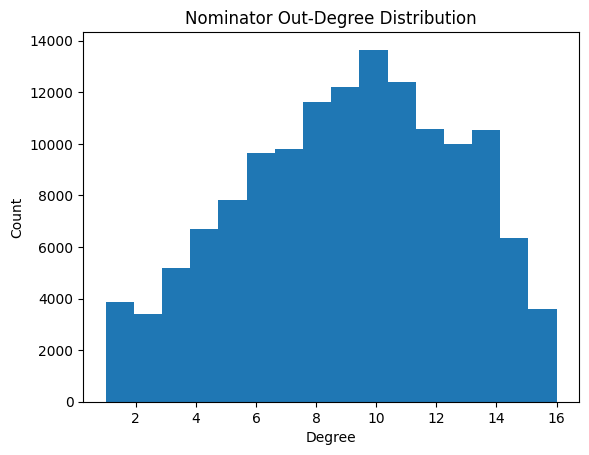

In [29]:
plt.hist(df['nominator_degree'], bins=16)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Nominator Out-Degree Distribution')

In [35]:
era = 990
with open(f'../data_collection/data/snapshot_data/{era}_snapshot.json') as f:
    data = json.load(f)

In [62]:
nominator_validator_preference_counts = []
for row in data['voters']:
    nominator_validator_preference_counts.append(len(row[2]))
nominator_validator_preference_counts = pd.DataFrame(nominator_validator_preference_counts)
nominator_validator_preference_counts.columns = ['nominator_validator_preference_counts']

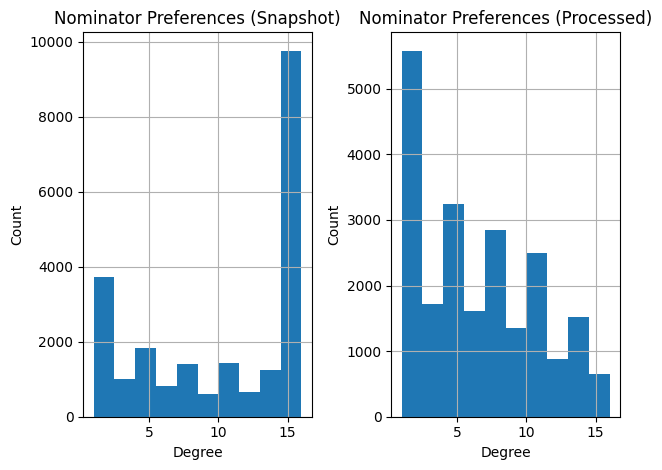

In [71]:
fig, axes = plt.subplots(1, 2)

nominator_validator_preference_counts.hist("nominator_validator_preference_counts", ax=axes[0])
df.groupby('nominator')['nominator_degree'].first().reset_index().hist('nominator_degree', ax=axes[1])
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Count')
axes[0].set_title('Nominator Preferences (Snapshot)')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Count')
axes[1].set_title('Nominator Preferences (Processed)')
fig.tight_layout()
plt.show()

,nominator,nominator_degree
0,111BmabW5wwTjz6VbKHD9jCwWQtNz2PugddS2orLRbdgMK,4
1,1122baMYr18CfTKPqRerzM4Zthv7q6b3aJtEbugg32g39GK,1
2,11233qXh9wqztw1H1FDMb6Ku3AAACnT4iVHdwcfasyKwSwrf,2
3,112439qDrECV8fZ5YWbQet4bx6RJJ2qfj7zX2gzyxYbr19q3,12
4,11264h8MNuFYJeukdod1FAeRnUUvQpAfCjcya2f5K9ASRXkp,2
...,...,...
21895,1zwfwxuks38XbTUrUvyYapbczksLHQuFUpCtWeshgMn6E6w,7
21896,1zxV8irCMjKVrT7qTtRgYSsYCMFQvhCr5s56bHvZTYMTy2U,4
21897,1zy9Lwry57fdX6e4VEjiskhcQZsm8BGkPofv23qbTKwWBNr,12
21898,1zyzVjvWKcsJq6oK3r6a3XHYWXygV3m4aev8RmAX8bHKWE2,13


In [77]:
validator_count = {}
for row in data['voters']:
    for validator in row[2]:
        if validator in data['targets']:
            if validator in validator_count.keys():
                validator_count[validator] += 1
            else:
                validator_count[validator] = 1


In [81]:
count_validators_df = pd.DataFrame(validator_count.values())
count_validators_df.columns = ['count']

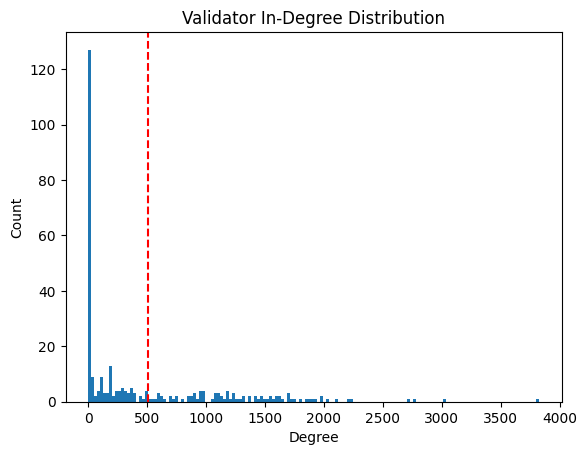

In [75]:
plt.hist(df.groupby('validator')['validator_degree'].first(), bins=150)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Validator In-Degree Distribution')
plt.axvline(x=512, color='red', linestyle='--')
plt.show()

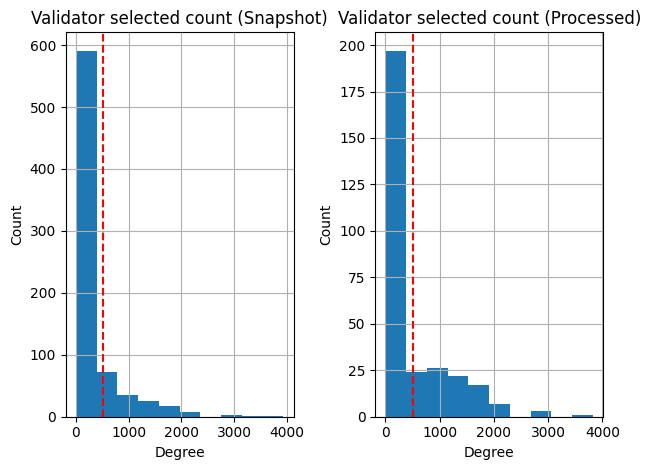

In [85]:
fig, axes = plt.subplots(1, 2)
count_validators_df.hist('count', ax=axes[0])
df.groupby('validator')['validator_degree'].first().reset_index().hist('validator_degree', ax=axes[1])
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Count')
axes[0].set_title('Validator selected count (Snapshot)')
axes[0].axvline(x=512, color='red', linestyle='--')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Count')
axes[1].set_title('Validator selected count (Processed)')
axes[1].axvline(x=512, color='red', linestyle='--')
fig.tight_layout()
plt.show()


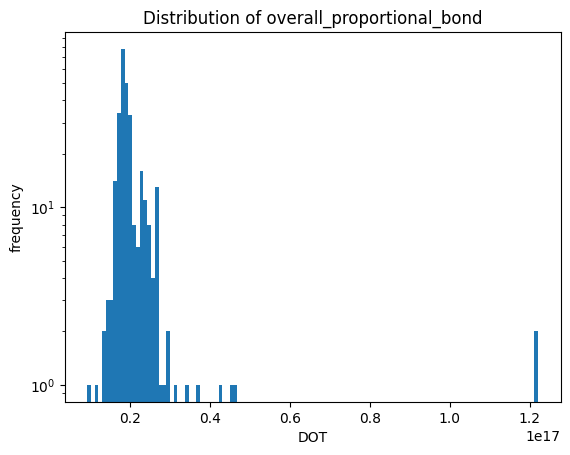

In [92]:
bins = np.histogram_bin_edges(df.groupby("validator")['overall_proportional_bond'].nth(0), bins="auto")
plt.hist(df.groupby("validator")['overall_proportional_bond'].nth(0), bins=bins, alpha=1)
plt.yscale('log')
plt.title("Distribution of overall_proportional_bond")
plt.xlabel("DOT")
plt.ylabel("frequency")
plt.show()

In [91]:
df.groupby("validator")['overall_proportional_bond'].nth(0).describe()

count    2.970000e+02
mean     2.059264e+16
std      9.354937e+15
min      9.166650e+15
25%      1.774499e+16
50%      1.871506e+16
75%      2.090073e+16
max      1.220699e+17
Name: overall_proportional_bond, dtype: float64

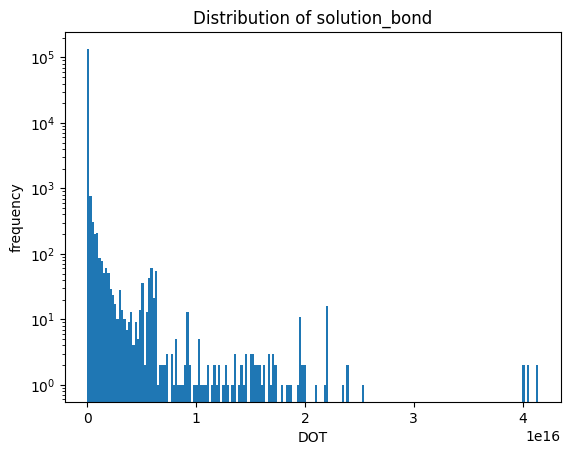

In [126]:

plt.hist(df['solution_bond'], bins=200, alpha=1)
plt.title("Distribution of solution_bond")
plt.yscale('log')
plt.xlabel("DOT")
plt.ylabel("frequency")
plt.show()

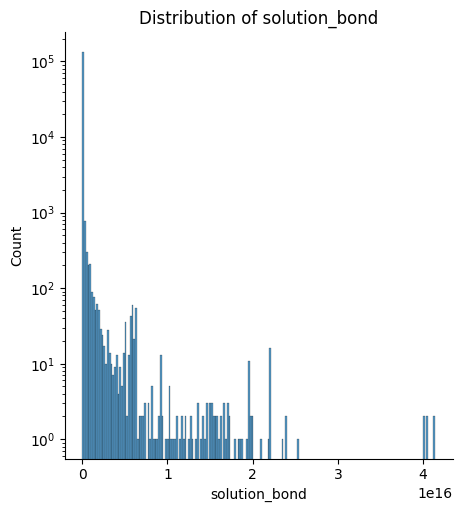

In [123]:
bins = np.histogram_bin_edges(df['solution_bond'], bins="auto")
sns.displot(df['solution_bond'], bins=200)
plt.title("Distribution of solution_bond")
plt.yscale('log')
plt.show()

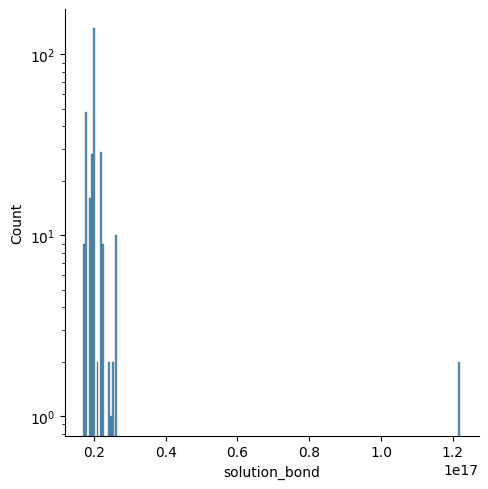

In [119]:
sns.displot(df.groupby("validator")['solution_bond'].sum(), bins=200)
plt.yscale('log')
plt.show()

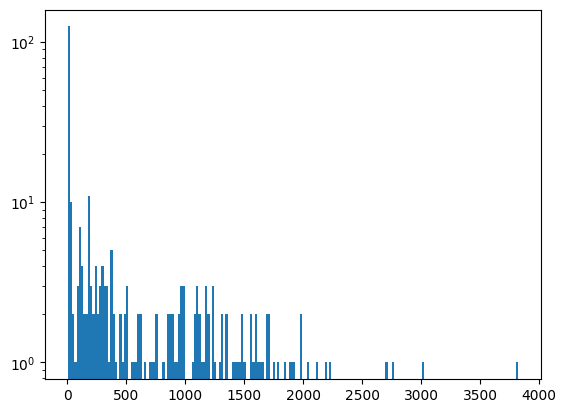

In [130]:
plt.hist(df.groupby("validator")['validator_frequency_current_era'].first(), bins=200, alpha=1)
plt.yscale('log')
plt.show()